# Basic tutorial on Pandas

Arnab Laha, IISER Pune<br>
Email: laha.arnab@students.iiserpune.ac.in or arnab.laha@cern.ch

### Documentation and tutorials:
- https://pandas.pydata.org/docs/user_guide/index.html#user-guide
- Pandas Cookbook: http://github.com/jvns/pandas-cookbook
- https://github.com/jorisvandenbossche/pandas-tutorial/blob/master/pandas_introduction.ipynb

### Pandas: data analysis in python
- Pandas has three elements: row, column, and data
- Pandas support any heterogenoeus data 
- Easy to manipulate columns, rows and applying mathematical application
- Easy to work with tabular data structure
- In this tutorial we will emphasize on pandas dataframe for our ML course purpose

### Goal of this tutorial:
- Read text files in pandas dataframe
- Manipulate columns, make new dataframes
- How to do simple mathematical operation on columnar data
- Select and apply filters on columnar data
- Transforming pandas column to numpy arrays
- Plotting column values using matplotlib 

<hr>
Requirement: python 3.9, pandas, matplotlib, numpy

<hr>
For this exercise, we have data of an exam with 300 students.<br>
They took the exam for maths, phy, chem and bio.<br> 
(code: generate_fakemarks.py)

### textfile name: <mark> fake_exam.txt</mark>

It is a toy exam generated by random number generator using python


## If you are using Google Collab

- Open Google Collab Notebook and do the following to get data

> !wget "https://github.com/alaha999/MLPhyCourse/blob/main/week1/tutorials_basic/fake_exam.txt"

- This text file will be downloaded in your present directory which is <mark>/content</mark>
- To check execute
    - > !pwd<br>
      > !ls
    
    
So let's begin...


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Pandas tutoiral starts

In [3]:
#Read the fake marks data in pandas dataframe

# check first 5 entries
!head -5 fake_exam.txt

#define column name
col_names = ["firstname","lastname","math","phy","chem","bio"]

#define column index
cols=[0,1,2,3,4,5]

#read
df = pd.read_csv("fake_exam.txt",sep=" ",index_col=None, usecols=cols,names=col_names)

#show first 5 entries
df.head(5)

ABHINAV Saoji 23 9 10 61 
Pankaj Gupta 56 41 94 44 
Avinash Vyas 54 35 25 88 
Kumar Seetharaman 46 22 40 88 
Rajeev Yash 91 93 46 81 


,firstname,lastname,math,phy,chem,bio
0,ABHINAV,Saoji,23,9,10,61
1,Pankaj,Gupta,56,41,94,44
2,Avinash,Vyas,54,35,25,88
3,Kumar,Seetharaman,46,22,40,88
4,Rajeev,Yash,91,93,46,81


In [4]:
## print all the columns in a dataframe
df.keys()

Index(['firstname', 'lastname', 'math', 'phy', 'chem', 'bio'], dtype='object')

In [5]:
## Index
df.index

RangeIndex(start=0, stop=200, step=1)

In [6]:
## datatype
df.dtypes

firstname    object
lastname     object
math          int64
phy           int64
chem          int64
bio           int64
dtype: object

### Cleaning and organizing data

It should look much cleaner if we add a new column, name = firstname + lastname

In [7]:
#join firstname and lastname and add at left of the dataframe
name=df[["firstname", "lastname"]].apply(lambda x: " ".join(x), axis =1)
df.insert(loc=0,column='name',value=name)

In [8]:
#clean the dataframe by dropping columns
df=df.drop(['firstname','lastname'],axis=1)

In [9]:
#show randomly sampled 5 entries
df.sample(5)

,name,math,phy,chem,bio
177,Avinash Ravi,52,90,30,30
20,Harikrishnan Mahapatra,77,96,76,88
102,Siddhant CHANDAK,74,52,68,64
97,Prachurjya KB,84,80,57,55
40,Arun Laha,57,21,87,82


In [10]:
#describe the statistics of the data
df.describe()

,math,phy,chem,bio
count,200.00000,200.000000,200.000000,200.000000
mean,50.43500,52.920000,52.410000,56.815000
std,27.69877,27.750026,25.746969,24.417861
min,0.00000,3.000000,5.000000,1.000000
25%,26.75000,29.500000,31.750000,39.000000
50%,53.50000,53.000000,49.000000,60.000000
75%,74.25000,78.000000,74.250000,77.000000
max,98.00000,99.000000,99.000000,99.000000


In [11]:
# max marks in a column (let's say math)
print(df['math'].max())
print(df['chem'].min())

## You can see the upper table which is a nice summary of the exam

98
5


In [12]:
#Information of dataframe column type, entries and memories it takes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    200 non-null    object
 1   math    200 non-null    int64 
 2   phy     200 non-null    int64 
 3   chem    200 non-null    int64 
 4   bio     200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Sorting

In [13]:
df.sort_values(by='phy',ascending=False).head()

,name,math,phy,chem,bio
189,ABHINAV KB,37,99,29,30
18,ANURAKTI Hazarika,52,98,28,88
67,Rajeev CHANDAK,41,98,44,32
94,Avinash Saoji,60,97,75,27
41,Anantha CHANDAK,3,97,5,57


## Selecting data by label/index

In [14]:
#locate row
df.loc[0]

name    ABHINAV Saoji
math               23
phy                 9
chem               10
bio                61
Name: 0, dtype: object

In [15]:
#Return row 0 and 1
print(df.loc[[0,1]])

            name  math  phy  chem  bio
0  ABHINAV Saoji    23    9    10   61
1   Pankaj Gupta    56   41    94   44


In [16]:
df.loc[df['chem']<50,['name','math','phy']]

,name,math,phy
0,ABHINAV Saoji,23,9
2,Avinash Vyas,54,35
3,Kumar Seetharaman,46,22
4,Rajeev Yash,91,93
5,Siddhant SURYA,42,87
...,...,...,...
191,Arun Mahapatra,31,16
194,Pankaj Hazarika,72,21
196,Nisarg Laha,20,39
198,Varna SURYA,33,23


In [17]:
# Adding a column named total marks
df["total"]= df.sum(axis=1)

#last 5 entries
df.tail()

,name,math,phy,chem,bio,total
195,Harikrishnan Ganguly,42,83,75,54,254
196,Nisarg Laha,20,39,49,84,192
197,Khadekar Ravi,92,70,99,80,341
198,Varna SURYA,33,23,35,44,135
199,Siddhant GUPTA,12,79,41,74,206


In [18]:
#choose only 10 rows from 20th student to 50th student
#using iloc function(one can select rows)
df_2= df.iloc[20:50] 

In [19]:
df_2.head()

,name,math,phy,chem,bio,total
20,Harikrishnan Mahapatra,77,96,76,88,337
21,Prachurjya Mohammed,97,14,24,45,180
22,Arun Maheshwari,58,39,76,94,267
23,ANURAKTI Seetharaman,56,86,38,47,227
24,Siddharth Mohammed,51,91,47,51,240


In [20]:
df_new = df['bio'].iloc[20:50]

In [21]:
df_new.values

array([88, 45, 94, 47, 51, 81, 45, 61, 70, 55, 70, 77, 68, 17, 12, 50, 92,
       32, 68, 49, 82, 57, 99, 65, 94, 72, 54, 27, 64, 87])

# Group By

The "group by" concept: we want to apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure


In [22]:
## Let's create a column with designation of the student
import random
df['position']= [random.choice(['phd','iphd','bsms']) for i in range(200)]

df.head()

,name,math,phy,chem,bio,total,position
0,ABHINAV Saoji,23,9,10,61,103,phd
1,Pankaj Gupta,56,41,94,44,235,phd
2,Avinash Vyas,54,35,25,88,202,iphd
3,Kumar Seetharaman,46,22,40,88,196,phd
4,Rajeev Yash,91,93,46,81,311,iphd


In [23]:
df_group=df.groupby('position')

In [24]:
# to check groups
 df_group.groups

{'bsms': Int64Index([  6,   7,   8,  11,  12,  16,  18,  22,  25,  31,  32,  35,  39,
              42,  49,  57,  58,  63,  66,  70,  76,  88,  94,  95,  99, 101,
             102, 105, 107, 108, 109, 114, 115, 124, 131, 132, 133, 138, 141,
             143, 144, 145, 148, 149, 150, 151, 152, 155, 157, 160, 163, 166,
             167, 168, 173, 174, 177, 178, 179, 182, 185, 191, 194, 196],
            dtype='int64'),
 'iphd': Int64Index([  2,   4,   5,   9,  10,  13,  17,  19,  21,  23,  27,  28,  29,
              34,  36,  37,  40,  41,  43,  45,  50,  51,  53,  54,  60,  61,
              67,  68,  69,  72,  75,  77,  78,  83,  84,  90,  92,  97, 111,
             113, 120, 121, 125, 126, 130, 134, 137, 139, 142, 146, 147, 153,
             159, 165, 169, 170, 175, 180, 186, 187, 192, 193, 195, 197, 198],
            dtype='int64'),
 'phd': Int64Index([  0,   1,   3,  14,  15,  20,  24,  26,  30,  33,  38,  44,  46,
              47,  48,  52,  55,  56,  59,  62,  64,  65,  71,  73

In [25]:
## show the mean of phys marks for all group(bsms, iphd and phd)
df_group['phy'].mean()

position
bsms    51.828125
iphd    53.123077
phd     53.718310
Name: phy, dtype: float64

## Query

used for selection or filtering rows

In [26]:
## show me tge students who got more marks in phy than math

df3=df.query('phy>math')
df3.head()

,name,math,phy,chem,bio,total,position
4,Rajeev Yash,91,93,46,81,311,iphd
5,Siddhant SURYA,42,87,33,43,205,iphd
6,Nisarg Laha,74,79,96,60,309,bsms
11,Arnab Maheshwari,13,85,96,68,262,bsms
12,Pranav GUPTA,30,91,73,94,288,bsms


In [27]:
print(f"Total no of students who got more marks in physics than math= {df3.shape[0]}")
print(f"In these set of students, highest marks in math is = {df3['math'].max()}")

Total no of students who got more marks in physics than math= 106
In these set of students, highest marks in math is = 91


In [28]:
## show me the students who got more marks in phy than math but phy marks is less than bio

df4 = df.query('phy>math & bio>phy')
df4.head(8)

,name,math,phy,chem,bio,total,position
12,Pranav GUPTA,30,91,73,94,288,bsms
15,Prachurjya Gupta,43,78,79,94,294,phd
17,Deep Mahapatra,13,16,63,69,161,iphd
33,Katha Vyas,0,11,22,17,50,phd
43,Katha Mahapatra,4,5,27,65,101,iphd
48,Arnab Shree,25,36,44,64,169,phd
49,Khadekar Vandra,9,30,76,87,202,bsms
53,Pankaj Vyas,74,85,99,90,348,iphd


In [29]:
## concatenate these two set of students in to one dataframe

df_concat = pd.concat([df3,df4])
df_concat.sample(3)

,name,math,phy,chem,bio,total,position
140,Pushkar SURYA,26,90,92,20,228,phd
27,ANURAKTI Gupta,44,73,25,61,203,iphd
157,Arnab Ganguly,2,34,42,43,121,bsms


In [30]:
## There is another way of filtering

df_filtered = df[df['math']>90]  ## all students who has more than 90 marks in math

df_filtered.head()

,name,math,phy,chem,bio,total,position
4,Rajeev Yash,91,93,46,81,311,iphd
21,Prachurjya Mohammed,97,14,24,45,180,iphd
45,Avinash Ranjan,91,84,66,72,313,iphd
62,Om Shenoy,91,97,51,60,299,phd
68,Nisarg Mohammed,96,49,80,40,265,iphd


In [31]:
## Trasnform pandas column in numpy arrays

math_numpy=df['math'].values

print(math_numpy)

[23 56 54 46 91 42 74 72 65 85 55 13 30 48 50 43 65 13 52 75 77 97 58 56
 51 89 48 44 54 14 43 16 38  0  4 57 12 81 79 76 57  3 80  4 75 91 80 28
 25  9 83 19 69 74 58 11 64 15 49 42 65 75 91 82 48 57 12 41 96 54 90  8
 63 49 62  5 28 41 35 91 41 35 98 56  2 83 70 26 92 98 82 74 54 73 60 78
 28 84 24 79 66 83 74 78 43 63 22 63 49  7 84 15 35  4 56 69 77  6 13 49
 62 81 43 22 92 92 60 60 25  1 75 97 18 76 54 35 53 25 25 32 26 78 97 66
 41 55 23 12 28 71  9 53 54 27 17 11 20  2 38 91 38 88 32 30  2 83 25 71
 95 28 25 69 79 71  0 67 65 52 58 29 83 69 33 27 26 20 84 32 69 37 86 31
  7 90 72 42 20 92 33 12]


# Plotting

In [32]:
# Plot subject marks for all students

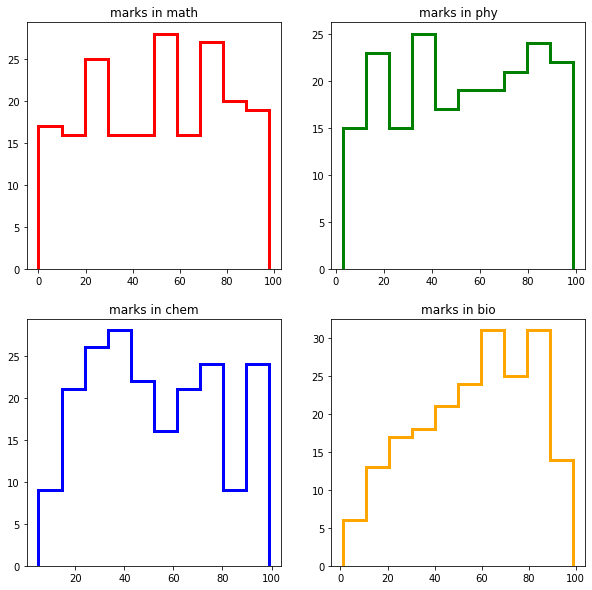

In [33]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
ax=ax.flatten()

ax[0].hist(df['math'],bins=10,histtype='step',lw=3,color='red', label="math")
ax[0].set_title("marks in math")

ax[1].hist(df['phy'],bins=10,histtype='step', lw=3,color='green',label="phy")
ax[1].set_title("marks in phy")

ax[2].hist(df['chem'],bins=10,histtype='step',lw=3,color='blue',label="chem")
ax[2].set_title("marks in chem")

ax[3].hist(df['bio'],bins=10,histtype='step', lw=3,color='orange',label="bio")
ax[3].set_title("marks in bio")

plt.show()


### HomeTask
##  add legend, xlabel, ylabel, grid, change fonts etc 

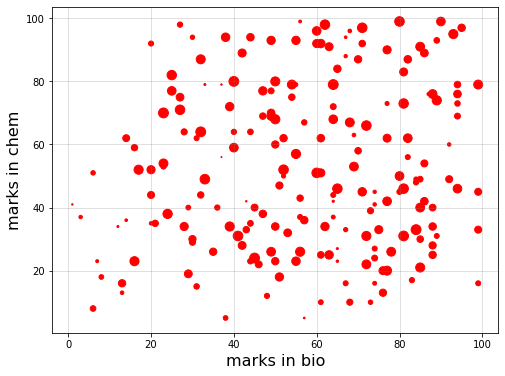

In [34]:
## scatter plot

## Let's say we want to visulalize how students are doing in chem AND bio 


fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(df['bio'],df['chem'],s=df['math'],c='red')   ## so here the dotsize = marks in maths
ax.set_xlabel('marks in bio',fontsize=16)
ax.set_ylabel('marks in chem',fontsize=16)

ax.grid('--',c='grey',alpha=0.3)

plt.show()


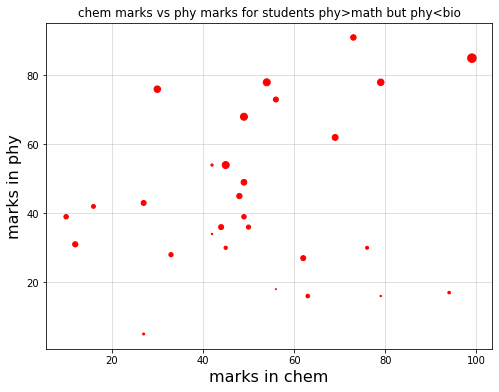

In [35]:
# Remember that we asked a question:
#"show me the students who got more marks in phy than math but phy marks is less than bio"
# we save them as df4

# scatter plot of their chemistry marks vs math marks

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(df4['chem'],df4['phy'],s=df4['math'],c='red')   ## so here the dotsize = marks in maths
ax.set_xlabel('marks in chem',fontsize=16)
ax.set_ylabel('marks in phy',fontsize=16)
ax.set_title('chem marks vs phy marks for students phy>math but phy<bio')
ax.grid('--',c='grey',alpha=0.3)

plt.show()



## Explain the outcome